## NULL HYPOTHESES

1) $H_0:$ The age distribution for both male and female riders is the same.

$H_A:$  There is a different age distribution for male riders than for female riders.

2) $H_0:$ The age distribution of riders is the same at night as it is during the day.

$H_A:$ There is a different age distribution for riders during the night than there is during the day.

In [1]:
from __future__ import print_function
import numpy as np
import pylab as pl
import scipy.stats as sps
import pandas as pd
import os
import sys

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def getBikeDataCSV(mon):
    # Based loosely on Federica's code
    basename = mon + "-citibike-tripdata"
    zipname = basename + ".zip"
    os.chdir(puidata) # Now all file operations without an absolute path will take place in puidata
    fullfile = puidata + "/" + zipname
    # Check if the file is present
    print("Checking presence of " + zipname)
    print(os.getenv("PWD"))
    if os.path.isfile(puidata + "/" + basename + ".csv"):
        print("Already have the file")
        return
    if os.path.isfile(basename + ".csv"):
        print("Found file " + basename + ".csv")
        if os.path.isfile(mon + "-citibike-tripdata.csv"):
            if os.system("mv " + mon + "-citibike-tripdata.csv " + puidata):
                print("Could not move file to " + puidata)
                return
    else:
        print("Downloading file " + zipname)
        if not os.path.isfile(fullfile):
            os.system("curl -O " + sitename + "/" + zipname)
            if os.path.isfile(fullfile):
                print("Got " + zipname + "\n")
                os.system("unzip -q " + fullfile)
            else:
                print("Failed\n")
                return

In [3]:
sitename = "http://s3.amazonaws.com/tripdata"
puidata = os.getenv("PUIDATA")
initmon = "201501"
getBikeDataCSV(initmon)
df = pd.read_csv(puidata + "/" + initmon + "-citibike-tripdata.csv")
csvcols = df.keys()
holdcols = ["starttime", "stoptime", "birth year", "gender", "usertype"]
dropcols = []
for col in csvcols:
    if not col in holdcols: dropcols.append(col)
df.drop(dropcols, axis=1, inplace=True)
df.shape

Checking presence of 201501-citibike-tripdata.zip
/wingrdp/homedirs/ss4977/PUI2016_ss4977/HW4_ss4977
Already have the file


(285552, 5)

In [4]:
for appmon in range(2,13):
    append_file = "2015{:02d}".format(appmon)
    getBikeDataCSV(append_file)
    appdf = pd.read_csv(puidata + "/" + append_file + "-citibike-tripdata.csv")
    appdf.drop(dropcols, axis=1, inplace=True)
    df = df.append(appdf, ignore_index=True)
df.shape

Checking presence of 201502-citibike-tripdata.zip
/wingrdp/homedirs/ss4977/PUI2016_ss4977/HW4_ss4977
Already have the file
Checking presence of 201503-citibike-tripdata.zip
/wingrdp/homedirs/ss4977/PUI2016_ss4977/HW4_ss4977
Already have the file
Checking presence of 201504-citibike-tripdata.zip
/wingrdp/homedirs/ss4977/PUI2016_ss4977/HW4_ss4977
Already have the file
Checking presence of 201505-citibike-tripdata.zip
/wingrdp/homedirs/ss4977/PUI2016_ss4977/HW4_ss4977
Already have the file
Checking presence of 201506-citibike-tripdata.zip
/wingrdp/homedirs/ss4977/PUI2016_ss4977/HW4_ss4977
Already have the file
Checking presence of 201507-citibike-tripdata.zip
/wingrdp/homedirs/ss4977/PUI2016_ss4977/HW4_ss4977
Already have the file
Checking presence of 201508-citibike-tripdata.zip
/wingrdp/homedirs/ss4977/PUI2016_ss4977/HW4_ss4977
Already have the file
Checking presence of 201509-citibike-tripdata.zip
/wingrdp/homedirs/ss4977/PUI2016_ss4977/HW4_ss4977
Already have the file
Checking presenc

(9937969, 5)

In [5]:
df["ageM"] = 2016 - df["birth year"][(df["usertype"] == "Subscriber") & (df["gender"] == 1)]
df["ageF"] = 2016 - df["birth year"][(df["usertype"] == "Subscriber") & (df["gender"] == 2)]
df.tail(5)

,starttime,stoptime,usertype,birth year,gender,ageM,ageF
9937964,12/31/2015 16:50:17,12/31/2015 16:58:46,Subscriber,1957.0,1,59.0,NaN
9937965,12/31/2015 17:17:52,12/31/2015 17:27:43,Subscriber,1978.0,1,38.0,NaN
9937966,12/31/2015 17:56:22,12/31/2015 17:59:39,Subscriber,1959.0,1,57.0,NaN
9937967,12/31/2015 21:20:38,12/31/2015 21:26:50,Subscriber,1987.0,1,29.0,NaN
9937968,12/31/2015 21:49:19,12/31/2015 21:55:55,Subscriber,1968.0,1,48.0,NaN


In [6]:
ser_m = df["ageM"]
ser_m.dropna(inplace=True)
ser_f = df["ageF"]
ser_f.dropna(inplace=True)
print(ser_m.shape)
print(ser_f.shape)

(6608883,)
(2006962,)


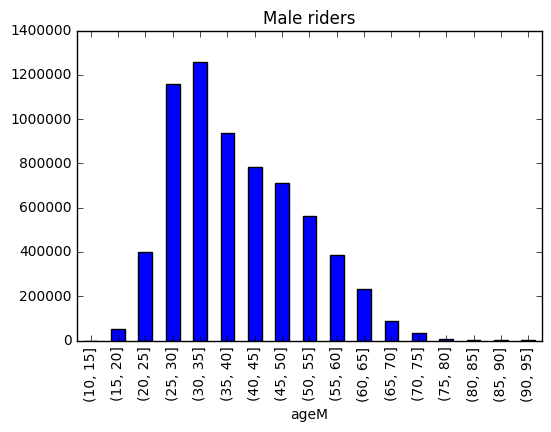

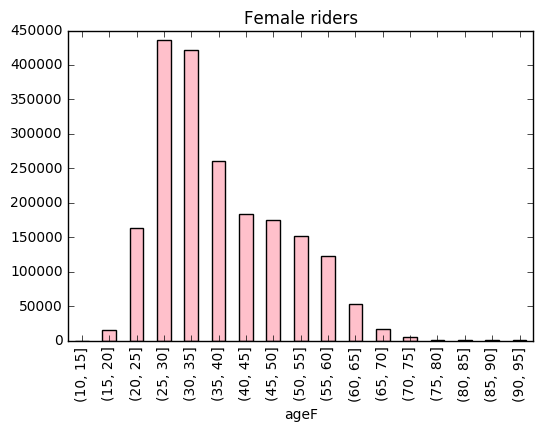

In [7]:
bins = np.arange(10, 99, 5)
agegrpM = df.ageM.groupby(pd.cut(df.ageM, bins))
ageaggM = agegrpM.agg([np.count_nonzero])
axM = ageaggM.plot(kind="bar", legend=False)
axM.set_title("Male riders")
agegrpF = df.ageF.groupby(pd.cut(df.ageF, bins))
ageaggF = agegrpF.agg([np.count_nonzero])
axF = ageaggF.plot(kind="bar", legend=False, color="pink")
axF.set_title("Female riders")

In [8]:
csM = ageaggM.cumsum()
csF = ageaggF.cumsum()
print(np.abs(csM / csM.max() - csF / csF.max()))

          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.000245
(20, 25]       0.020862
(25, 30]       0.062964
(30, 35]       0.082275
(35, 40]       0.070484
(40, 45]       0.043089
(45, 50]       0.022732
(50, 55]       0.013108
(55, 60]       0.015682
(60, 65]       0.007300
(65, 70]       0.002579
(70, 75]       0.000421
(75, 80]       0.000168
(80, 85]       0.000046
(85, 90]       0.000014
(90, 95]       0.000000


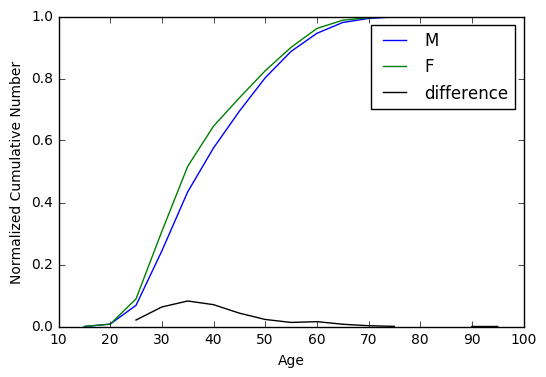

In [9]:
normM = csM / csM.max()
normF = csF / csF.max()
pl.plot(bins[:-1] + 5, normM, label = "M")
pl.plot(bins[:-1] + 5, normF, label = "F")
pl.plot(bins[:-1] +5, np.sqrt(normF - normM)**2, "k-", label="difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

In [11]:
ks = sps.ks_2samp(df.ageM, df.ageF)
print(ks)

Ks_2sampResult(statistic=0.10742099062433116, pvalue=0.0)


The result from the Kolmogorov-Smirnov test indicates rejection of the null hypothesis about distribution of age by gender with a p-value that is less than can be measured.

In [12]:
# Now to do the Pearson test
pearson_gen = sps.pearsonr(ageaggF, ageaggM)
print(pearson_gen)

(array([ 0.97637797]), array([  2.16124752e-11]))


The result from the Pearson test indicates rejection of the null hypothesis about distribution of age by gender with a p-value of $2.16\times10^{-11}$.

In [13]:
# Now the Spearman test
spear_gen = sps.spearmanr(ageaggF, ageaggM)
print(spear_gen)

SpearmanrResult(correlation=0.99264705882352955, pvalue=3.5782738227033259e-15)


The result from the Spearman test indicates rejection of the null hypothesis about distribution of age by gender with a p-value of $3.58\times10^{-15}$.

          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.000420
(20, 25]       0.018601
(25, 30]       0.062589
(30, 35]       0.076707
(35, 40]       0.063697
(40, 45]       0.037437
(45, 50]       0.018920
(50, 55]       0.005972
(55, 60]       0.011369
(60, 65]       0.004690
(65, 70]       0.001950
(70, 75]       0.000009
(75, 80]       0.000483
(80, 85]       0.000171
(85, 90]       0.000030
(90, 95]       0.000000


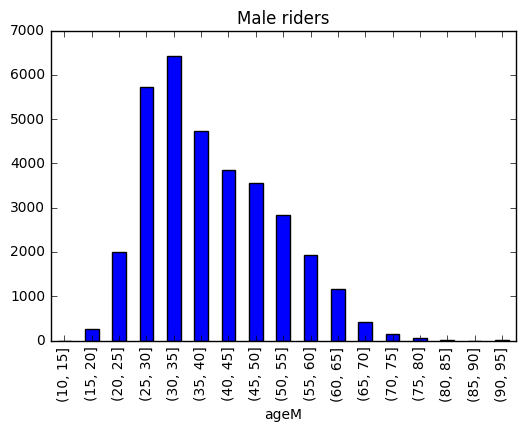

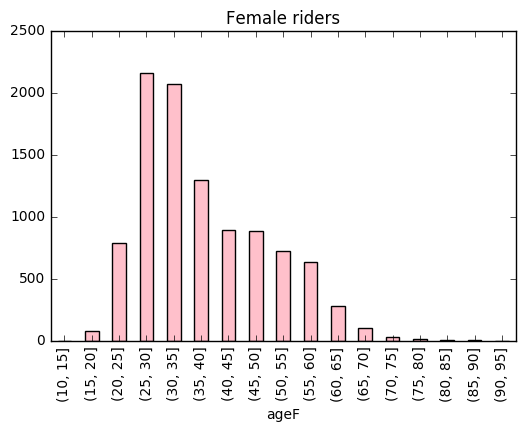

In [15]:
# Now to reduce the sample size by a factor of 200 and see what the effect is.
# Start by selecting every 200th element from the main DataFrame and repeat all the tests
# done previously on that DF

dsize = df.shape
numelems = dsize[0]
select_list = np.arange(0, numelems, 200)
df200 = df.iloc[select_list]
ser200_m = df200["ageM"]
ser200_m.dropna(inplace=True)
ser200_f = df200["ageF"]
ser200_f.dropna(inplace=True)
agegrp200M = df200.ageM.groupby(pd.cut(df200.ageM, bins))
ageagg200M = agegrp200M.agg([np.count_nonzero])
ax200M = ageagg200M.plot(kind="bar", legend=False)
ax200M.set_title("Male riders")
agegrp200F = df200.ageF.groupby(pd.cut(df200.ageF, bins))
ageagg200F = agegrp200F.agg([np.count_nonzero])
ax200F = ageagg200F.plot(kind="bar", legend=False, color="pink")
ax200F.set_title("Female riders")
cs200M = ageagg200M.cumsum()
cs200F = ageagg200F.cumsum()
print(np.abs(cs200M / cs200M.max() - cs200F / cs200F.max()))

Ks_2sampResult(statistic=0.1035071337887521, pvalue=1.0899454656676581e-71)
(array([ 0.97648075]), array([  2.09233274e-11]))
SpearmanrResult(correlation=0.98957055214723921, pvalue=4.8789891970986605e-14)


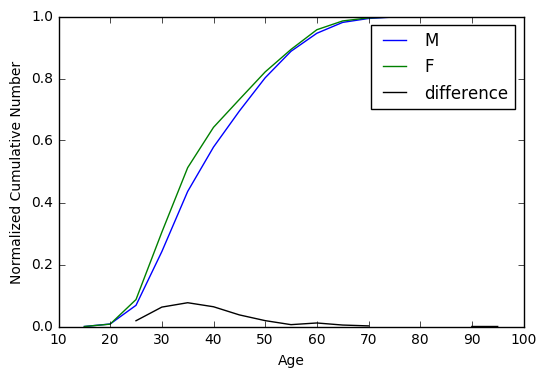

In [16]:
norm200M = cs200M / cs200M.max()
norm200F = cs200F / cs200F.max()
pl.plot(bins[:-1] + 5, norm200M, label = "M")
pl.plot(bins[:-1] + 5, norm200F, label = "F")
pl.plot(bins[:-1] +5, np.sqrt(norm200F - norm200M)**2, "k-", label="difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()
ks200 = sps.ks_2samp(df200.ageM, df200.ageF)
print(ks200)
pearson_gen200 = sps.pearsonr(ageagg200F, ageagg200M)
print(pearson_gen200)
spear_gen200 = sps.spearmanr(ageagg200F, ageagg200M)
print(spear_gen200)

Qualitatively, the results were the same with the reduced sample size as they were with the full data set. However, the p-values were generally larger.

<table><tr><td>Test</td><td>Full data set</td><td>Reduced set</td></tr>
<tr><td>K-S</td><td>0</td><td>1.09 e-71</td></tr>
<tr><td>Pearson</td><td>2.16 e-11</td><td>2.09 e-11</td></tr>
<tr><td>Spearman</td><td>3.58 e-15</td><td>4.88 e-14</td></tr></table>

In [19]:
# Now to repeat each of the tests for day vs. night.
# Define day as start time that is after 7:00 and end time that is before 19:00
# Define night as start and end time that is not between 6:00 and 20:00.

dftime = df200
dftime["start"] = pd.to_datetime(dftime["starttime"]).dt.hour
dftime["end"] = pd.to_datetime(dftime["stoptime"]).dt.hour

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [22]:
dftime["ageday"] = 2016 - dftime["birth year"][(dftime["usertype"] == "Subscriber") &
                                               (dftime["start"] >= 7) & (dftime["end"] < 19)]
dftime["agenight"] = 2016 - dftime["birth year"][(dftime["usertype"] == "Subscriber") &
                                                 ((dftime["start"] < 6) | (dftime["start"] >= 20)) &
                                                 ((dftime["end"] < 6) | (dftime["end"] >= 20))]
dftime["ageday"].dropna(inplace=True)
dftime["agenight"].dropna(inplace=True)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [23]:
dftime.head(8)

,starttime,stoptime,usertype,birth year,gender,ageM,ageF,start,end,ageday,agenight
0,1/1/2015 0:01,1/1/2015 0:24,Subscriber,1960.0,2,NaN,56.0,0,0,NaN,56.0
200,1/1/2015 1:36,1/1/2015 1:46,Subscriber,1965.0,1,51.0,NaN,1,1,NaN,51.0
400,1/1/2015 2:52,1/1/2015 2:58,Subscriber,1989.0,1,27.0,NaN,2,2,NaN,27.0
600,1/1/2015 7:02,1/1/2015 7:07,Subscriber,1957.0,1,59.0,NaN,7,7,59.0,NaN
800,1/1/2015 9:41,1/1/2015 9:52,Customer,NaN,0,NaN,NaN,9,9,NaN,NaN
1000,1/1/2015 10:46,1/1/2015 10:56,Subscriber,1984.0,1,32.0,NaN,10,10,32.0,NaN
1200,1/1/2015 11:30,1/1/2015 11:48,Subscriber,1955.0,1,61.0,NaN,11,11,61.0,NaN
1400,1/1/2015 12:05,1/1/2015 12:16,Subscriber,1986.0,1,30.0,NaN,12,12,30.0,NaN


          count_nonzero
ageday                 
(10, 15]       0.000000
(15, 20]       0.002686
(20, 25]       0.028934
(25, 30]       0.097291
(30, 35]       0.125628
(35, 40]       0.113951
(40, 45]       0.092952
(45, 50]       0.061263
(50, 55]       0.041073
(55, 60]       0.018313
(60, 65]       0.005350
(65, 70]       0.001616
(70, 75]       0.000333
(75, 80]       0.000118
(80, 85]       0.000105
(85, 90]       0.000167
(90, 95]       0.000000


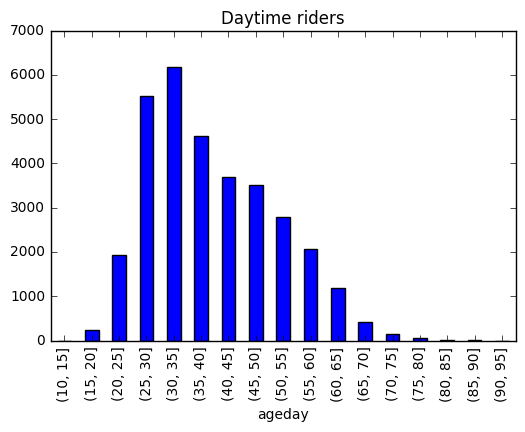

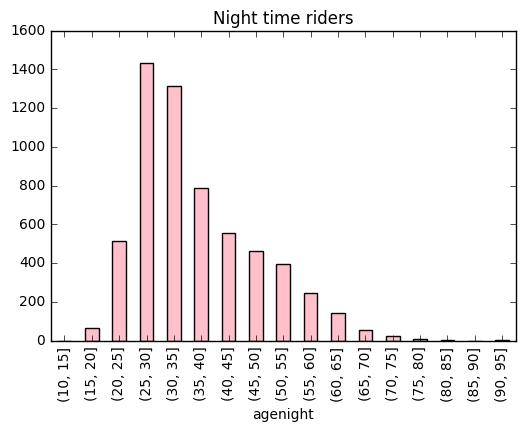

In [24]:
ser_d = dftime["ageday"]
ser_d.dropna(inplace=True)
ser_n = df200["agenight"]
ser_n.dropna(inplace=True)
agegrpD = dftime.ageday.groupby(pd.cut(dftime.ageday, bins))
ageaggD = agegrpD.agg([np.count_nonzero])
axD = ageaggD.plot(kind="bar", legend=False)
axD.set_title("Daytime riders")
agegrpN = dftime.agenight.groupby(pd.cut(dftime.agenight, bins))
ageaggN = agegrpN.agg([np.count_nonzero])
axN = ageaggN.plot(kind="bar", legend=False, color="pink")
axN.set_title("Night time riders")
csD = ageaggD.cumsum()
csN = ageaggN.cumsum()
print(np.abs(csD / csD.max() - csN / csN.max()))

Ks_2sampResult(statistic=0.15493768657902401, pvalue=2.8938042630988266e-106)
(array([ 0.95546565]), array([  2.36389576e-09]))
SpearmanrResult(correlation=0.97237587382316704, pvalue=6.9095968693777187e-11)


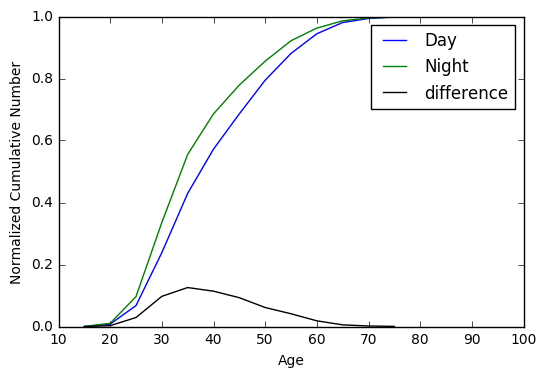

In [25]:
normD = csD / csD.max()
normN = csN / csN.max()
pl.plot(bins[:-1] + 5, normD, label = "Day")
pl.plot(bins[:-1] + 5, normN, label = "Night")
pl.plot(bins[:-1] +5, np.sqrt(normN - normD)**2, "k-", label="difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()
kstime = sps.ks_2samp(dftime.ageday, dftime.agenight)
print(kstime)
pearson_time = sps.pearsonr(ageaggN, ageaggD)
print(pearson_time)
spear_time = sps.spearmanr(ageaggN, ageaggD)
print(spear_time)

The Kolmogorov-Smirnov, Pearson, and Spearman p-values were $2.89\times10^{-106}$, $2.36\times10^{-9}$, and $6.91\times10^{-11}$ respectively. On this basis, the null hypothesis of day and night riders having the same age distribution can be rejected.